In [3]:
!pip install pandas

^C


In [4]:
!pip install seaborn 

In [2]:
import pandas as pd
from pandas import read_csv

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import scipy.stats as stats


In [5]:
df = read_csv(r"C:\Users\user\Desktop\ml\mfk_matstat.2024\flights_NY.csv").dropna(axis = 0)

In [6]:
df.head(10)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762
5,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719
6,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065
7,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229
8,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944
9,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327346 entries, 0 to 336769
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       327346 non-null  int64  
 1   month      327346 non-null  int64  
 2   day        327346 non-null  int64  
 3   dep_time   327346 non-null  float64
 4   dep_delay  327346 non-null  float64
 5   arr_time   327346 non-null  float64
 6   arr_delay  327346 non-null  float64
 7   carrier    327346 non-null  object 
 8   tailnum    327346 non-null  object 
 9   flight     327346 non-null  int64  
 10  origin     327346 non-null  object 
 11  dest       327346 non-null  object 
 12  air_time   327346 non-null  float64
 13  distance   327346 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 37.5+ MB


In [6]:
# 1. По каждой авиакомпании оцените вероятность того, 
# что задержка прилета будет положительной и нарисуйте график, 
# показывающий распределение этой вероятности по авиакомпаниям.

In [52]:
print("Количество авиакомпаний =", df[['carrier', 'dep_delay']].groupby(by = 'carrier').sum().shape[0])
print("среднее время задержки \n", df[['carrier', 'dep_delay']].groupby(by = 'carrier').mean().reset_index())

Количество авиакомпаний = 15
среднее время задержки 
    carrier  dep_delay
0       9E  16.439574
1       AA   8.214508
2       AS   5.830748
3       B6  12.944125
4       DL   9.318468
5       EV  19.838929
6       F9  20.201175
7       FL  18.605984
8       MQ  10.445381
9       OO  12.586207
10      UA  12.187052
11      US   3.744693
12      VX  10.409801
13      WN  17.661657
14      YV  18.898897


In [47]:
df1 = df[df['dep_delay']>0][['carrier', 'dep_delay']].groupby(by = 'carrier').count().sort_values(by='dep_delay', ascending=False).reset_index()
df2 = df[['carrier', 'dep_delay']].groupby(by = 'carrier').count().sort_values(by='dep_delay', ascending=False).reset_index()

In [48]:
merged_df = pd.merge(df1, df2, on='carrier', suffixes=('_df1', '_df2'))
merged_dfч

,carrier,dep_delay_df1,dep_delay_df2
0,UA,26167,54974
1,EV,22976,51108
2,B6,20936,53029
3,DL,14668,45810
4,AA,9496,30549
5,MQ,7966,25037
6,9E,6980,17294
7,WN,6535,12044
8,US,4762,19831
9,FL,1647,3175


In [53]:
df1t = pd.DataFrame()
df1t['carrier'] = merged_df['carrier']
df1t['probability'] = merged_df['dep_delay_df1'] / merged_df['dep_delay_df2']
df1t = df1t.sort_values(by = 'probability', ascending=False)
print(df1t)

   carrier  probability
7       WN     0.542594
9       FL     0.518740
11      F9     0.499266
0       UA     0.475989
1       EV     0.449558
12      YV     0.426471
6       9E     0.403608
10      VX     0.399838
2       B6     0.394803
3       DL     0.320192
5       MQ     0.318169
13      AS     0.317348
4       AA     0.310845
14      OO     0.310345
8       US     0.240129


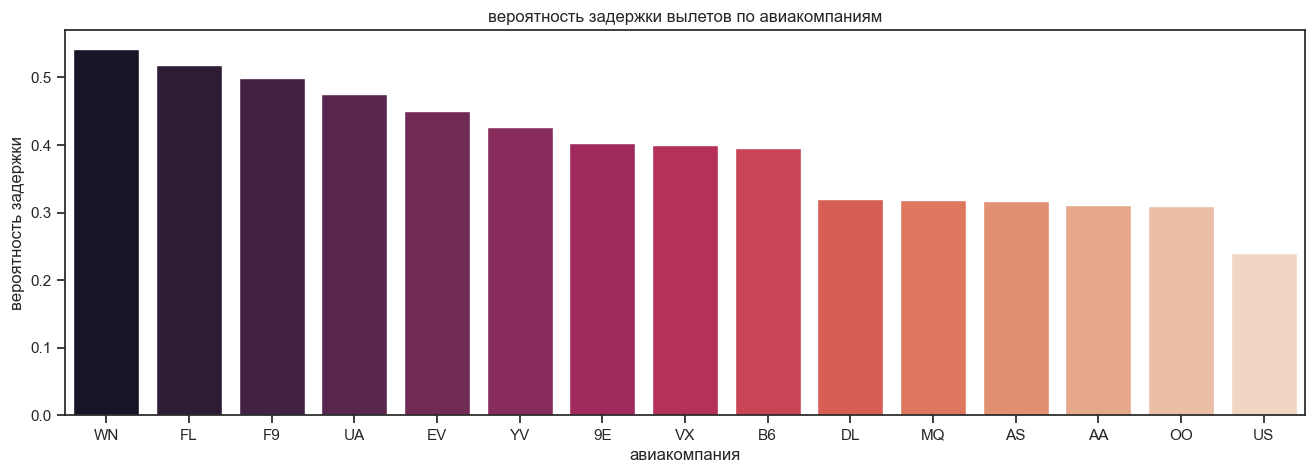

In [54]:
sns.set_theme(style = 'ticks')
plt.figure(figsize = (16, 5))
barplot = sns.barplot(x = 'carrier', y = 'probability', data = df1t, palette = 'rocket')
plt.xlabel('авиакомпания')
plt.ylabel('вероятность задержки')
plt.title('вероятность задержки вылетов по авиакомпаниям')  
plt.show()

In [11]:
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762


In [12]:
df[['tailnum', 'distance']].sort_values(by = 'distance')

,tailnum,distance
12180,N14953,80
114627,N29917,80
3426,N15983,80
112694,N18120,80
26874,N13553,80
...,...,...
184221,N392HA,4983
304928,N389HA,4983
314910,N380HA,4983
222441,N388HA,4983


In [13]:
print(df['distance'].describe())

count    327346.000000
mean       1048.371314
std         735.908523
min          80.000000
25%         509.000000
50%         888.000000
75%        1389.000000
max        4983.000000
Name: distance, dtype: float64


In [14]:
quantile_99 = df['distance'].quantile(0.99)

In [15]:
quantile_99

2586.0

In [16]:
df = df[df['distance']<quantile_99]

In [17]:
quantile_one_third = df['distance'].quantile(0.33)
quantile_two_thirds = df['distance'].quantile(0.66)

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


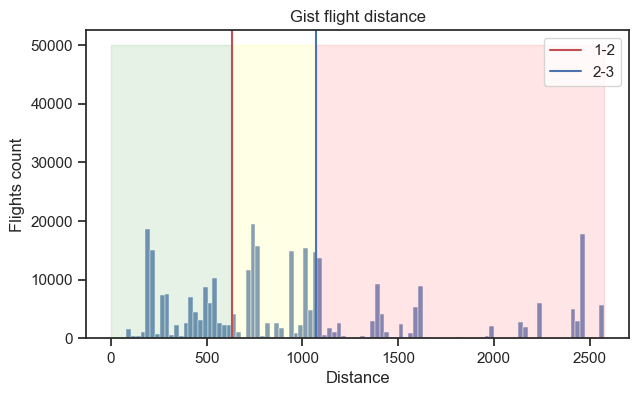

In [18]:
plt.figure(figsize=(7, 4))
sns.histplot(df['distance'], bins=100, kde=False)
plt.axvline(x=quantile_one_third, color='r', linestyle='-', label='1-2')
plt.axvline(x=quantile_two_thirds, color='b', linestyle='-', label='2-3')

y_max = 50000
plt.fill_betweenx([0, y_max], 0, quantile_one_third, color='green', alpha=0.1)
plt.fill_betweenx([0, y_max], quantile_one_third, quantile_two_thirds, color='yellow', alpha=0.1)
plt.fill_betweenx([0, y_max], quantile_two_thirds, df['distance'].max(), color='red', alpha=0.1)

plt.title('Gist flight distance')
plt.xlabel('Distance')
plt.ylabel('Flights count')
plt.legend()
plt.show()

In [19]:
# Для вывода пунктов назначений из длинной области воспользуаемся методом unique

In [20]:
df[df['distance']>quantile_two_thirds]['dest'].unique()

array(['IAH', 'MIA', 'BQN', 'LAX', 'SFO', 'DFW', 'LAS', 'FLL', 'RSW',
       'SJU', 'PHX', 'DEN', 'SNA', 'MSY', 'SLC', 'XNA', 'SEA', 'SAN',
       'JAC', 'AUS', 'STT', 'EGE', 'HOU', 'LGB', 'BUR', 'MCI', 'SAT',
       'PDX', 'SJC', 'OMA', 'OAK', 'SMF', 'PSE', 'TUL', 'OKC', 'HDN',
       'BZN', 'MTJ', 'EYW', 'PSP', 'ABQ'], dtype=object)

In [44]:
print('Среднее время задержки вылета для области коротких перелетов: ', df[df['distance']<quantile_one_third]['dep_delay'].mean())
print('Среднее время задержки вылета для области средних перелетов: ', df[(df['distance']<quantile_two_thirds)&(df['distance']>quantile_one_third)]['dep_delay'].mean())
print('Среднее время задержки вылета для области длинных перелетов: ', df[df['distance']>quantile_two_thirds]['dep_delay'].mean())

Среднее время задержки вылета для области коротких перелетов:  12.972168722945787
Среднее время задержки вылета для области средних перелетов:  13.563077701453619
Среднее время задержки вылета для области длинных перелетов:  11.185518830222389


In [57]:
grouped_df = df.groupby(by = 'month')['dep_delay']

In [58]:
means = grouped_df.mean()
std_devs = grouped_df.std()
n = grouped_df.count()

In [61]:
sme = std_devs/np.sqrt(n)

In [62]:
trust = 0.95
ci_lower = means - trust * sme
ci_upper = means + trust * sme

C:\Users\user\AppData\Local\Temp\ipykernel_17368\1270296431.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x=means.index, y=means, yerr=[means - ci_lower, ci_upper - means], fmt='o', ecolor='r', capsize=4, capthick=1, marker='s', markersize=3)


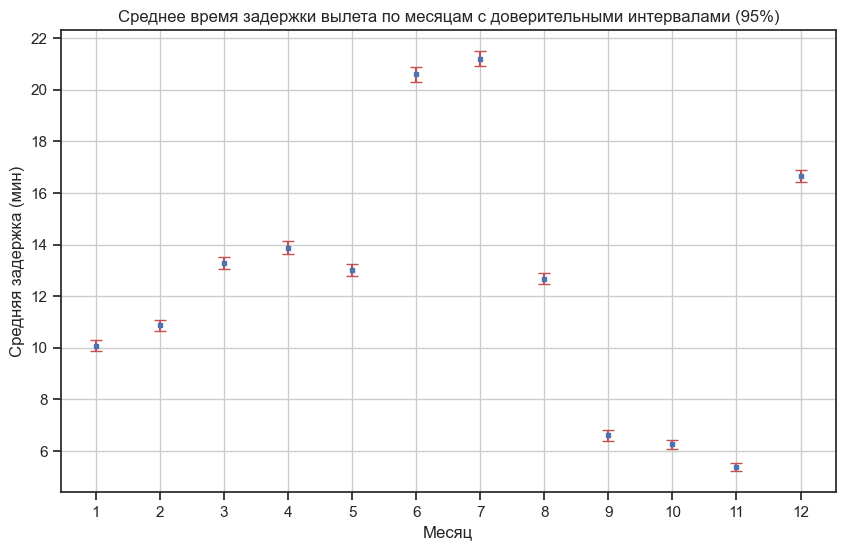

In [87]:
plt.figure(figsize=(10, 6))
plt.errorbar(x=means.index, y=means, yerr=[means - ci_lower, ci_upper - means], fmt='o', ecolor='r', capsize=4, capthick=1, marker='s', markersize=3)
plt.title('Среднее время задержки вылета по месяцам с доверительными интервалами (95%)')
plt.xlabel('Месяц')
plt.ylabel('Средняя задержка (мин)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

In [70]:
january_data = df[df['month'] == 1]['dep_delay']
february_data = df[df['month'] == 2]['dep_delay']

# Проведение двухвыборочного t-теста
t_statistic, p_value = stats.ttest_ind(january_data, february_data)

print(f"t-статистика: {t_statistic}")
print(f"p-значение: {p_value}")

# Проверка гипотезы на уровне значимости 0.05
alpha_05 = 0.05
if p_value < alpha_05:
    print("Отвергаем нулевую гипотезу на уровне значимости 0.05")
else:
    print("Не можем отвергнуть нулевую гипотезу на уровне значимости 0.05")

# Проверка гипотезы на уровне значимости 0.01
alpha_01 = 0.01
if p_value < alpha_01:
    print("Отвергаем нулевую гипотезу на уровне значимости 0.01")
else:
    print("Не можем отвергать нулевую гипотезу на уровне значимости 0.01")

t-статистика: -2.426723604886544
p-значение: 0.015239465878896305
Отвергаем нулевую гипотезу на уровне значимости 0.05
Не можем отвергать нулевую гипотезу на уровне значимости 0.01


In [79]:
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762


In [96]:
from sklearn.linear_model import LinearRegression

In [108]:
X = df['distance'].values.reshape(-1, 1)
Y = df['air_time'].values.reshape(-1, 1)

In [116]:
lr = LinearRegression()
lr.fit(X, Y)

LinearRegression()

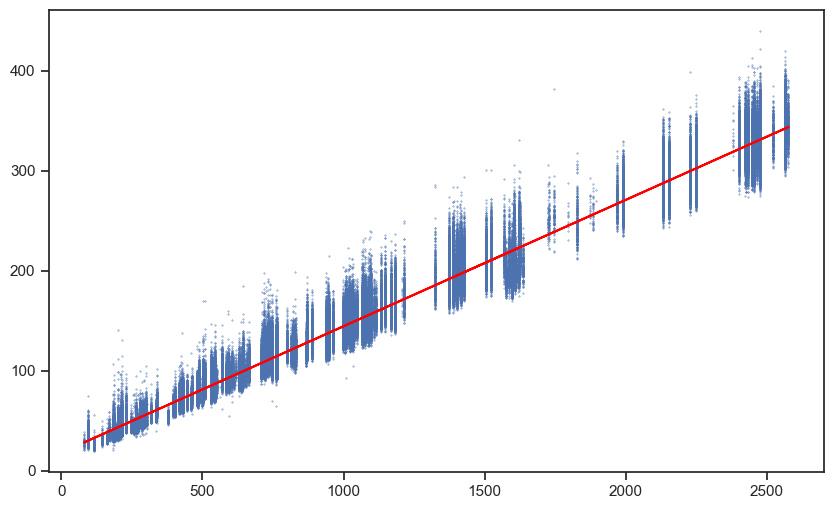

In [104]:
predictions = lr.predict(df['distance'].values.reshape(-1, 1))
plt.figure(figsize = (10, 6))
plt.scatter(x = df['distance'], y = df['air_time'], color = 'b', label='корелляция расстояния полета и времени полета', s=0.1)
plt.plot(df['distance'], predictions, color='red', label='Линейная регрессия')

In [112]:
print('коэффицент корреляции = ', np.corrcoef(df['distance'], df['air_time'])[0,1])

коэффицент корреляции =  0.9894473306809556


In [126]:
print('B1 = ', lr.intercept_[0] , 'B2 = ', *lr.coef_[0] , 'B3 = ', lr.score(X, Y))


B1 =  18.163913150569996 B2 =  0.1264135216356278 B3 =  0.9790060201916664


In [127]:
filtered_df = df[(df['dep_delay'] >= -15) & (df['dep_delay'] <= 15)]

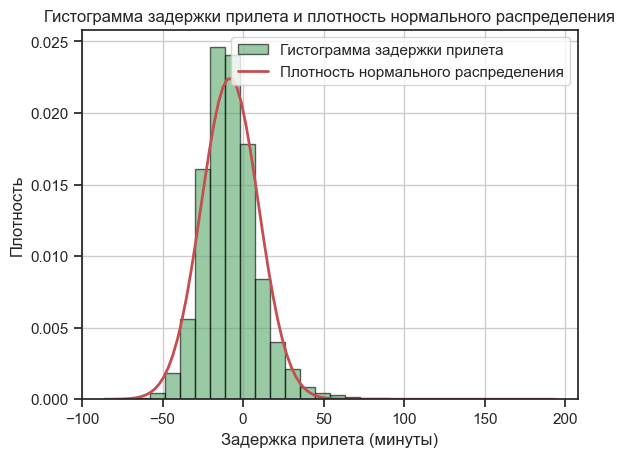

In [148]:
hist_values, bins, _ = plt.hist(filtered_df['arr_delay'], 
                                bins=30, density=True, alpha=0.6, color='g', 
                                edgecolor='black', label='Гистограмма задержки прилета')
mu, sigma = stats.norm.fit(filtered_df['arr_delay'])
x = np.linspace(min(filtered_df['arr_delay']), max(filtered_df['arr_delay']), 100)
pdf = stats.norm.pdf(x, mu, sigma)

plt.plot(x, pdf, 'r-', linewidth=2, label='Плотность нормального распределения')
plt.title('Гистограмма задержки прилета и плотность нормального распределения')
plt.xlabel('Задержка прилета (минуты)')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.show()

In [157]:
shapiro_test = stats.shapiro(filtered_df['arr_delay'])
shapiro_test

C:\Users\user\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.954134464263916, pvalue=0.0)

In [156]:
df['target'] = (df['arr_delay'] > 15).astype(int)

In [158]:
df['rel_dep_delay'] = df['dep_delay'] / df['air_time']  # относительная задержка вылета
df['is_long_flight'] = (df['distance'] > df['distance'].median()).astype(int)  # бинарный признак, длинный ли рейс

# Отбор признаков
features = ['dep_delay', 'distance', 'air_time', 'rel_dep_delay', 'is_long_flight']
X = df[features]
y = df['target']

In [159]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, classification_report

# Обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)


In [161]:
# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Подробный отчет о классификации
print(classification_report(y_test, y_pred))

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9127659351814063
Precision: 0.8922018348623854
Recall: 0.7197356828193833
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     72859
           1       0.89      0.72      0.80     22700

    accuracy                           0.91     95559
   macro avg       0.90      0.85      0.87     95559
weighted avg       0.91      0.91      0.91     95559

Confusion Matrix:
[[70885  1974]
 [ 6362 16338]]


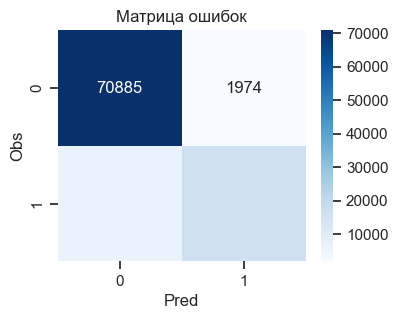

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Pred')
plt.ylabel('Obs')
plt.title('Матрица ошибок')
plt.show()

In [165]:
errors = X_test[(y_test != y_pred)]
print("Примеры ошибок модели:")
print(errors.head())


Примеры ошибок модели:
        dep_delay  distance  air_time  rel_dep_delay  is_long_flight
138664       -4.0      2434     360.0      -0.011111               1
192263       36.0      1029     150.0       0.240000               1
43156        -3.0      2133     310.0      -0.009677               1
183712       -6.0      1096     194.0      -0.030928               1
264294       10.0       431      66.0       0.151515               0
